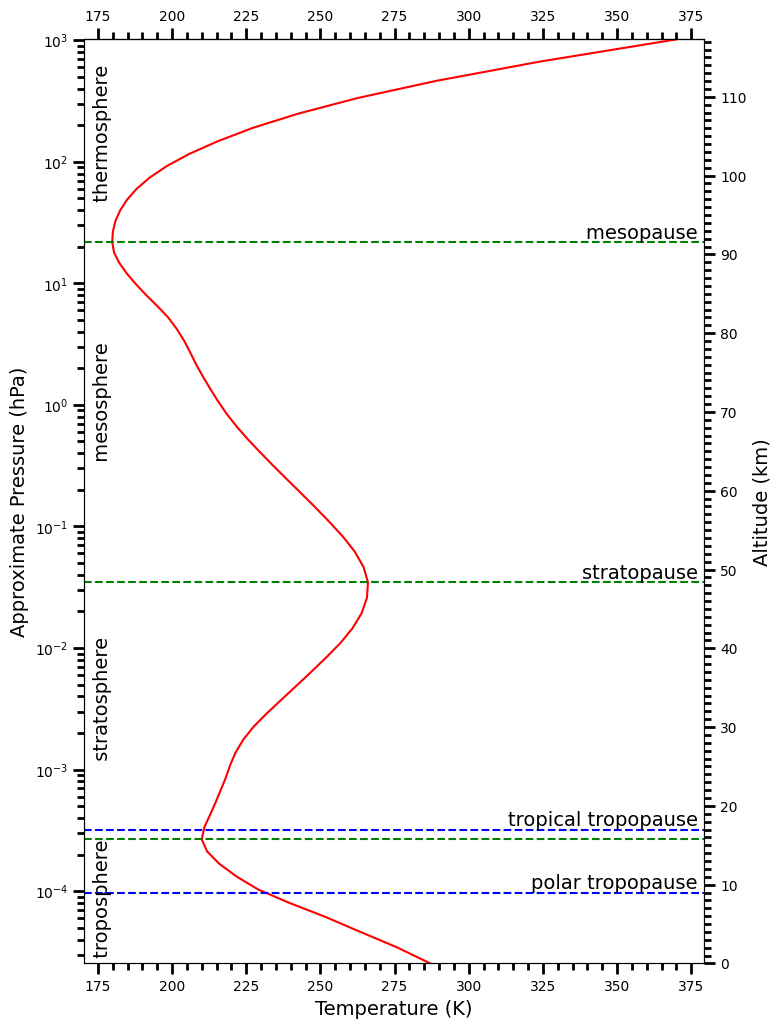

In [94]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
from scipy.signal import argrelextrema

# Constants
fsize = 14
major_tick_params = {'axis': 'both', 'which': 'major', 'direction': 'out', 'right': False, 'width': 2, 'length': 8}
minor_tick_params = {'axis': 'both', 'which': 'minor', 'direction': 'out', 'right': False, 'width': 2, 'length': 5}

# Load data
ncdata = xr.open_dataset('cira.nc')
mean_prof = ncdata.mean('time').mean('latitude')

# Create a log-scaled y-axis
fig, ax = plt.subplots()
mean_prof.ta.plot(ax=ax, yscale='log', y='plev', visible=False)

# Set labels and title
plt.xlabel('Temperature (K)', fontsize=fsize)
plt.ylabel('Approximate Pressure (hPa)', fontsize=fsize)
ax.invert_yaxis()

# Create a second y-axis for altitudes
ax2 = ax.twinx()
ax2.set_ylabel('Altitude (km)', fontsize=fsize)
ax2.plot(mean_prof.ta, mean_prof.zg/1000, 'r', label='T')

# Create a secondary x-axis at the top to match temperature
ax3 = ax.secondary_xaxis('top')

# Set tick parameters for major and minor ticks
for ax_obj in [ax, ax2, ax3]:
    ax_obj.tick_params(**major_tick_params)
    ax_obj.tick_params(**minor_tick_params)
    # Add minor ticks to x-axes (temperature axis)
    ax_obj.xaxis.set_minor_locator(AutoMinorLocator())    

# Add minor ticks to right y-axis
ax2.yaxis.set_major_locator(MultipleLocator(10))
ax2.yaxis.set_minor_locator(AutoMinorLocator(10))
ax2.tick_params(axis='both', width=2, length=5, which='both', direction='out', right=True)
ax2.tick_params(axis='both', width=2, length=8, which='major', direction='out', right=True)

# Calculate the minimum and maximum values for the y-axis
min_pressure = mean_prof.plev.min().values
max_pressure = mean_prof.plev.max().values
min_altitude = mean_prof.zg.min().values / 1000
max_altitude = mean_prof.zg.max().values / 1000

# Set the y-axis limits based on the calculated values
ax.set_ylim(min_pressure, max_pressure)
ax2.set_ylim(min_altitude, max_altitude)

# Set the aspect ratio of the figure
fig.set_size_inches(8, 12)

# Find local minima in the temperature data
temperature_data = mean_prof.ta.values
local_minima_indices = argrelextrema(temperature_data, np.less)
local_maxima_indices = argrelextrema(temperature_data, np.greater)

# Get the corresponding pressure values for the local minima
local_minima_pressures = mean_prof.plev[local_minima_indices]
local_maxima_pressures = mean_prof.plev[local_maxima_indices]

# Plot horizontal lines at the local minima
pausen = ['mesopause ', ' ']
for i,pressure in enumerate(local_minima_pressures):
    ax2.axhline(y=mean_prof.zg.sel(plev=pressure).values / 1000, color='g', linestyle='--', label='Local Minima')
    ax2.text(plt.xlim()[1], mean_prof.zg.sel(plev=pressure).values / 1000, pausen[i], va='bottom', ha='right', fontsize=fsize)  # Adjust the fontsize

# Plot horizontal lines at the local maxima
pausen = ['stratopause ']
for i,pressure in enumerate(local_maxima_pressures):
    ax2.axhline(y=mean_prof.zg.sel(plev=pressure).values / 1000, color='g', linestyle='--', label='Local Maxima')
    ax2.text(plt.xlim()[1], mean_prof.zg.sel(plev=pressure).values / 1000, pausen[i], va='bottom', ha='right', fontsize=fsize)  # Adjust the fontsize

# Add horizontal lines at specific altitudes with labels
altitudes = [9, 17]
pausen = ['polar tropopause ', 'tropical tropopause '  ]
for i, altitude in enumerate(altitudes):
    ax2.axhline(y=altitude, color='b', linestyle='--', label=pausen[i])
    ax2.text(plt.xlim()[1], altitude, pausen[i], va='bottom', ha='right', fontsize=fsize)  # Adjust the fontsize

altitudes = [0,25,63,96]
pausen = [' troposphere ', ' stratosphere ', ' mesosphere ', ' thermosphere']
for i, altitude in enumerate(altitudes):
    #ax2.axhline(y=altitude, color='b', linestyle='--', label=pausen[i])
    ax2.text(plt.xlim()[0]+3, altitude, pausen[i], va='bottom', ha='left', fontsize=fsize, rotation=90)  # Adjust the fontsize

# Apply tight layout
#plt.tight_layout()
plt.savefig('climCIRA.pdf')
# Show the plot
plt.show()
